In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"E:\Courses\Data science(ETLHive)\dataset\diabetes (1).csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [10]:
print(df.shape[0]) #count no of rows 
df.shape[1]        #count no of columns

768


9

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,122.242188,69.662760,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,3.369578,49.001676,24.827374,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,1150.000000,500.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


In [13]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Outcome', ylabel='count'>

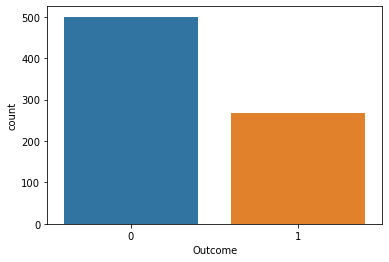

In [17]:
sns.countplot(df.Outcome) #Data is imbalanced

In [18]:
df.Outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [19]:
#defining x and y
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [20]:
#spliting variables
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [24]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
521,3,124,80,33,130,33.2,0.305,26
617,2,68,62,13,15,20.1,0.257,23
526,1,97,64,19,82,18.2,0.299,21
595,0,188,82,14,185,32.0,0.682,22
416,1,97,68,21,0,27.2,1.095,22


In [25]:
y_train.head()

521    0
617    0
526    0
595    1
416    0
Name: Outcome, dtype: int64

In [38]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score

In [39]:
LR=LogisticRegression()

In [40]:
LR.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred_test=LR.predict(x_test)

In [42]:
y_pred_test

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
#performance metrix (testing)
 
Accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(y_test,y_pred_test)
print('Classification_report: \n',Classification_report)

Recall = recall_score(y_test,y_pred_test)
print('Recall:',Recall)

Precision = precision_score(y_test,y_pred_test)
print('Precision:',Precision)

F1_score = f1_score(y_test,y_pred_test)
print('F1_score:',F1_score)

Accuracy: 0.7272727272727273
Confusion_matrix: 
 [[132  18]
 [ 45  36]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       150
           1       0.67      0.44      0.53        81

    accuracy                           0.73       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.72      0.73      0.71       231

Recall: 0.4444444444444444
Precision: 0.6666666666666666
F1_score: 0.5333333333333333


In [53]:
tn=132
tp=36
fp=18
fn=45

In [54]:
accuracy=(tp+tn)/(tp+tn+fp+fn)

0.7272727272727273

In [56]:
#for training data 

y_pred_train=LR.predict(x_train)

Accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(y_train,y_pred_train)
print('Classification_report: \n',Classification_report)

Recall = recall_score(y_train,y_pred_train)
print('Recall:',Recall)

Precision = precision_score(y_train,y_pred_train)
print('Precision:',Precision)

F1_score = f1_score(y_train,y_pred_train)
print('F1_score:',F1_score)

Accuracy: 0.7430167597765364
Confusion_matrix: 
 [[309  41]
 [ 97  90]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       350
           1       0.69      0.48      0.57       187

    accuracy                           0.74       537
   macro avg       0.72      0.68      0.69       537
weighted avg       0.74      0.74      0.73       537

Recall: 0.48128342245989303
Precision: 0.6870229007633588
F1_score: 0.5660377358490567
